<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/05deeplearning/clase_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 44 ejercicios

### 1. Dimensional reduction with PCA:

In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [2]:
# Execute the codes in TensorFlow 2.0 without editing those in version 1.x (except for the contrib module).
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#### 1.1. Read in data and preprocess:

In [4]:
# Read data.
data_raw = load_iris()
X = data_raw['data']
y = data_raw['target'].reshape(-1,1)

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convert into a DataFrame and view.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth']      # Column names
df = pd.DataFrame(X_scaled,columns=header)
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


#### 1.2. Display the PCA result:

In [7]:
# Reduce to 2 dimension.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Convert the integer labels into color names.
mycolor = []
for i in y:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')

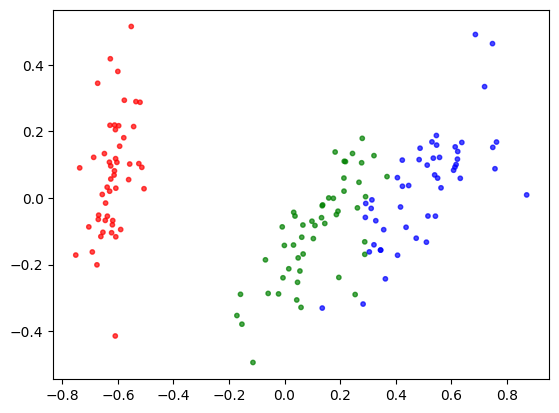

In [9]:
# Visualize.
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
plt.show()

### 2. Dimensional reduction with AutoEncoder:

#### 2.1. Define an AutoEncoder model:

In [10]:
# Hyperparameters definition
n_input = 4             # Input layers has as many nodes as the number of variables.
n_hidden = 2            # The number of nodes in the hidden layer = 2 <= my target.
n_output = n_input      # The output should have the same number of nodes as the input.
learn_rate = 0.0001
n_epochs = 10001

In [11]:
# Variables definition
initializer = tf.variance_scaling_initializer()
W1 = tf.Variable(initializer([n_input, n_hidden]), dtype=tf.float32)
W2 = tf.Variable(initializer([n_hidden, n_output]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(n_hidden))
b2 = tf.Variable(tf.zeros(n_output))

In [12]:
# Placeholder definition
X_ph = tf.placeholder(tf.float32, shape=[None, n_input])

In [13]:
# AutoEncoder model definition
hidden_layer = tf.matmul(X_ph, W1) + b1                  # No activation.
y_model = tf.matmul(hidden_layer, W2) + b2

In [14]:
loss = tf.reduce_mean(tf.square(X_ph- y_model))         # 'X' takes the place of 'y'.

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

In [16]:
train = optimizer.minimize(loss)

In [17]:
init = tf.global_variables_initializer()

#### 2.2. AutoEncoder training:

In [18]:
with tf.Session() as sess:
        sess.run(init)
        for i in range(n_epochs):
            my_feed = {X_ph:X_scaled}
            sess.run(train, feed_dict = my_feed)
            if i % 1000 == 0:
                mse = sess.run(loss, feed_dict = my_feed)
                print("Step : {}    ,    MSE : {}".format(i, mse))
        X_auto = sess.run(hidden_layer, feed_dict = my_feed)       # Get the reduced dimensional representation from the hidden layer!!!

Step : 0    ,    MSE : 1.5185779333114624
Step : 1000    ,    MSE : 0.6462854743003845
Step : 2000    ,    MSE : 0.31167635321617126
Step : 3000    ,    MSE : 0.17683759331703186
Step : 4000    ,    MSE : 0.11510463804006577
Step : 5000    ,    MSE : 0.08305052667856216
Step : 6000    ,    MSE : 0.06790950894355774
Step : 7000    ,    MSE : 0.061186715960502625
Step : 8000    ,    MSE : 0.05637688189744949
Step : 9000    ,    MSE : 0.04893912747502327
Step : 10000    ,    MSE : 0.03736294060945511


#### 2.3. Compare the results of PCA vs AutoEncoder:

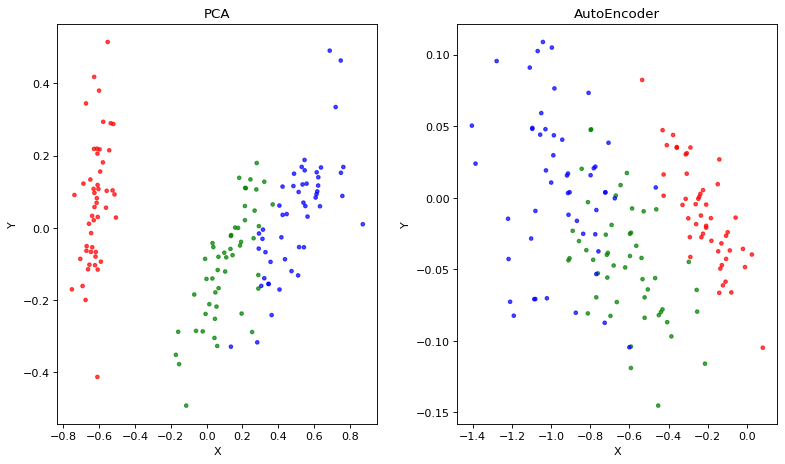

In [19]:
fig=plt.figure(figsize=(10,5), dpi=80)       # figsize= (Width, Height). Set DPI.
axes1 = fig.add_axes([0,0,0.4,1])            # Left, Bottom, Width, Height
axes2 = fig.add_axes([0.5,0,0.4,1])          # Left, Bottom, Width, Height
axes1.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes2.scatter(X_auto[:,0],X_auto[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('PCA')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('AutoEncoder')
plt.show()

In [21]:
# ==========================
# 1. Importación de librerías
# ==========================
import tensorflow as tf
import numpy as np

# --- tamaños ---
image_size = (28, 28)
flat_img = int(np.prod(image_size))   # <— fuerza a int
z_size = 20

# --- generador / discriminador (como ya los definiste) ---
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img,        # <— usa int
)

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# --- en lugar de model.build(...), haz un forward dummy ---
_ = gen_model(tf.zeros((1, z_size), dtype=tf.float32))
gen_model.summary()

_ = disc_model(tf.zeros((1, flat_img), dtype=tf.float32))
disc_model.summary()


# ======================================
# 2. Definir la función del Generador
# ======================================
def make_generator_network(
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=784  # 28*28
):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=num_hidden_units,
            use_bias=False
        ))
        model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Dense(
        units=num_output_units,
        activation="tanh"
    ))
    return model

# ======================================
# 3. Definir la función del Discriminador
# ======================================
def make_discriminator_network(
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=1
):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))

    model.add(tf.keras.layers.Dense(
        units=num_output_units,
        activation=None
    ))
    return model

# ======================================
# 4. Construcción de redes generador/discriminador
# ======================================
image_size = (28, 28)
z_size = 20
mode_z = "uniform"   # 'uniform' vs 'normal'

gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)

disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

# ======================================
# 5. Definir conjunto de datos de prueba
# ======================================
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image * 2.0 - 1.0  # Escalar a rango [-1, 1]

    if mode == "uniform":
        input_z = tf.random.uniform(
            shape=(z_size,),
            minval=-1.0, maxval=1.0
        )
    elif mode == "normal":
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist["train"]

print("before preprocessing: ")
example = next(iter(mnist_trainset))["image"]
print("dtype:", example.dtype,
      "minimum:", np.min(example),
      "maximum:", np.max(example))

mnist_trainset = mnist_trainset.map(preprocess)

print("after preprocessing: ")
example = next(iter(mnist_trainset))[0]
print("dtype:", example.dtype,
      "minimum:", np.min(example),
      "maximum:", np.max(example))

# ======================================
# 6. Crear lotes de entrenamiento
# ======================================
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True)
input_z, input_real = next(iter(mnist_trainset))

print("input-z -- shape:", input_z.shape)
print("input-real -- shape:", input_real.shape)

# ======================================
# 7. Propagación hacia adelante
# ======================================
g_output = gen_model(input_z)
print("Generator output -- shape:", g_output.shape)

d_logits_real = disc_model(input_real)
d_logits_fake = disc_model(g_output)

print("discriminator (real) -- shape:", d_logits_real.shape)
print("discriminator (fake) -- shape:", d_logits_fake.shape)

# ======================================
# 8. Definir pérdidas
# ======================================
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print("Generator loss: {:.4f}".format(g_loss))


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [22]:
# ======================================================
# 1) IMPORTS, VERSIONES Y SEMILLAS
# ======================================================
import tensorflow as tf               # Framework principal
import tensorflow_datasets as tfds    # Para cargar MNIST fácilmente
import numpy as np                    # Utilidades numéricas

print("TF:", tf.__version__)

# Fijamos semilla para reproducibilidad de resultados.
tf.random.set_seed(1)
np.random.seed(1)

# ======================================================
# 2) HIPERPARÁMETROS Y TAMAÑOS BÁSICOS
# ======================================================

# Tamaño de imagen de MNIST: 28x28 (escala de grises, 1 canal).
image_size = (28, 28)

# Aplanamos la imagen (28*28=784). Convertimos a int para evitar formas simbólicas.
flat_img = int(np.prod(image_size))  # ✅ importante en TF/Keras 3

# Dimensión del vector latente z (ruido de entrada al generador).
z_size = 20

# Cómo muestreamos z: uniforme en [-1,1] o normal ~N(0,1).
mode_z = "uniform"   # 'uniform' o 'normal'

# Arquitectura mínima (una capa oculta en cada red, 100 unidades).
gen_hidden_layers  = 1
gen_hidden_size    = 100
disc_hidden_layers = 1
disc_hidden_size   = 100

# ======================================================
# 3) DEFINICIÓN DE LOS MODELOS (GENERADOR Y DISCRIMINADOR)
# ======================================================

def make_generator_network(
    num_hidden_layers: int = 1,
    num_hidden_units: int = 100,
    num_output_units: int = 784  # salida = imagen aplanada
):
    """
    Generador: MLP simple que recibe un vector z (ruido) y
    devuelve una 'imagen' aplanada en el rango [-1, 1] (tanh).
    """
    model = tf.keras.Sequential(name="generator")

    # Capas ocultas (todas densas + LeakyReLU). use_bias=False es opcional.
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units, use_bias=False))
        model.add(tf.keras.layers.LeakyReLU())

    # Capa de salida: tamaño 'flat_img' y activación tanh -> [-1, 1]
    model.add(tf.keras.layers.Dense(units=num_output_units, activation="tanh"))
    return model


def make_discriminator_network(
    num_hidden_layers: int = 1,
    num_hidden_units: int = 100,
    num_output_units: int = 1
):
    """
    Discriminador: MLP que toma una imagen aplanada (real o generada)
    y devuelve un logit (sin sigmoide) con activación None.
    """
    model = tf.keras.Sequential(name="discriminator")

    # Capas ocultas densas + LeakyReLU + Dropout (regularización simple).
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))

    # Capa de salida: 1 unidad (logit). from_logits=True en la pérdida.
    model.add(tf.keras.layers.Dense(units=num_output_units, activation=None))
    return model

# ======================================================
# 4) INSTANCIAR MODELOS Y "CONSTRUIRLOS" CON UN FORWARD DUMMY
# ======================================================

# Creamos los modelos con los tamaños definidos arriba.
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img      # ✅ usar int (no TensorShape)
)

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# ⚠️ En Keras 3, llamar a .build(...) puede dejar formas simbólicas que rompen .summary()
# Solución: hacer una pasada "dummy" (forward) para concretar las shapes internas.
_ = gen_model(tf.zeros((1, z_size), dtype=tf.float32))           # (batch=1, z_size)
gen_model.summary()

_ = disc_model(tf.zeros((1, flat_img), dtype=tf.float32))        # (batch=1, 784)
disc_model.summary()

# ======================================================
# 5) CARGA DE MNIST Y PREPROCESAMIENTO
# ======================================================

# Descarga/prepare de MNIST con TFDS.
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    """
    Recibe un ejemplo TFDS {'image': (28,28,1), 'label': ...}
    - Convierte a float32 en [0,1],
    - Aplana a vector de tamaño flat_img,
    - Reescala a [-1,1] (para que case con la salida tanh del generador),
    - Genera un vector z con la distribución indicada.
    Retorna: (input_z, image_vector)
    """
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.reshape(image, (flat_img,))                   # ✅ tupla de int
    image = image * 2.0 - 1.0                                # [-1,1]

    if mode == "uniform":
        input_z = tf.random.uniform((z_size,), minval=-1.0, maxval=1.0)
    else:  # 'normal'
        input_z = tf.random.normal((z_size,))
    return input_z, image

# Conjunto de entrenamiento "crudo" (antes del map).
mnist_trainset_raw = mnist["train"]

print("before preprocessing:")
ex_raw = next(iter(mnist_trainset_raw))["image"]
print("dtype:", ex_raw.dtype,
      "min:", tf.reduce_min(ex_raw).numpy(),
      "max:", tf.reduce_max(ex_raw).numpy())

# Aplicamos el preprocesamiento.
mnist_trainset = mnist_trainset_raw.map(lambda ex: preprocess(ex, mode=mode_z))

print("after preprocessing:")
ex_proc = next(iter(mnist_trainset))  # (z, image)
print("z dtype:",   ex_proc[0].dtype, "z shape:",   ex_proc[0].shape)
print("x dtype:",   ex_proc[1].dtype, "x shape:",   ex_proc[1].shape,
      "min:", tf.reduce_min(ex_proc[1]).numpy(),
      "max:", tf.reduce_max(ex_proc[1]).numpy())

# ======================================================
# 6) CREAR LOTES (BATCHING) Y COMPROBAR FORMAS
# ======================================================

batch_size = 32
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)

# Extraemos un batch de ejemplo: (input_z, input_real)
input_z, input_real = next(iter(mnist_trainset))
print("input-z  shape:", input_z.shape)   # (32, z_size)
print("input-x  shape:", input_real.shape)  # (32, 784)

# ======================================================
# 7) PROPAGACIÓN HACIA ADELANTE (FORWARD PASS DE PRUEBA)
# ======================================================

# Pasamos z por el generador -> imágenes falsas (aplanadas).
g_output = gen_model(input_z, training=False)
print("Generator output shape:", g_output.shape)  # (32, 784)

# Pasamos imágenes reales y falsas por el discriminador -> logits.
d_logits_real = disc_model(input_real, training=False)
d_logits_fake = disc_model(g_output,  training=False)

print("Discriminator (real) logits shape:", d_logits_real.shape)  # (32, 1)
print("Discriminator (fake) logits shape:", d_logits_fake.shape)  # (32, 1)

# ======================================================
# 8) DEFINIR PÉRDIDA DEL GENERADOR (BCE CON LOGITS)
# ======================================================

# Usaremos BinaryCrossentropy con from_logits=True porque el discriminador
# NO tiene sigmoide en la última capa.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador: quiere que el discriminador etiquete sus salidas como "reales" (1s).
g_labels_real = tf.ones_like(d_logits_fake)                  # vector de 1s con misma forma
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake) # BCE(fake vs 1)
print("Generator loss: {:.4f}".format(g_loss.numpy()))



TF: 2.19.0


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [23]:
# ==========================
# 1. Importación de librerías
# ==========================
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

print("TF:", tf.__version__)

# --- tamaños y semillas ---
image_size = (28, 28)
flat_img = int(np.prod(image_size))   # fuerza a int (evita TensorShape simbólico)
z_size = 20
tf.random.set_seed(1)
np.random.seed(1)

# ======================================
# 2. Definir la función del Generador (API Funcional, con Input explícito)
# ======================================
def make_generator_network(
    z_dim=20,
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=784  # 28*28
):
    """
    Generador MLP: Input z -> capas densas + LeakyReLU -> salida tanh en [-1, 1].
    Se usa API Funcional con tf.keras.Input para fijar shape desde el inicio.
    """
    inputs = tf.keras.Input(shape=(z_dim,), name="z_input")
    x = inputs
    for _ in range(num_hidden_layers):
        x = tf.keras.layers.Dense(units=num_hidden_units, use_bias=False)(x)
        x = tf.keras.layers.LeakyReLU()(x)
    outputs = tf.keras.layers.Dense(units=num_output_units, activation="tanh")(x)
    return tf.keras.Model(inputs, outputs, name="generator")

# ======================================
# 3. Definir la función del Discriminador (API Funcional, con Input explícito)
# ======================================
def make_discriminator_network(
    x_dim=784,
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=1
):
    """
    Discriminador MLP: Input imagen aplanada -> densas + LeakyReLU + Dropout -> logit.
    Salida sin activación (from_logits=True en la pérdida).
    """
    inputs = tf.keras.Input(shape=(x_dim,), name="x_input")
    x = inputs
    for _ in range(num_hidden_layers):
        x = tf.keras.layers.Dense(units=num_hidden_units)(x)
        x = tf.keras.layers.LeakyReLU()(x)
        x = tf.keras.layers.Dropout(rate=0.5)(x)
    outputs = tf.keras.layers.Dense(units=num_output_units, activation=None)(x)
    return tf.keras.Model(inputs, outputs, name="discriminator")

# ======================================
# 4. Construcción de redes generador/discriminador (sin forward dummy)
# ======================================
mode_z = "uniform"   # 'uniform' vs 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

gen_model = make_generator_network(
    z_dim=z_size,
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img
)
disc_model = make_discriminator_network(
    x_dim=flat_img,
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# Con Input explícito, summary() ya conoce las shapes y no falla.
gen_model.summary()
disc_model.summary()

# ======================================
# 5. Definir conjunto de datos de prueba (MNIST) + preprocesamiento
# ======================================
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    """
    - Convierte imagen a float32 en [0,1]
    - Aplana a vector de tamaño flat_img (int)
    - Reescala a [-1,1]
    - Genera z con distribución 'uniform' o 'normal'
    """
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.reshape(image, (flat_img,))                   # tupla de int (no [-1])
    image = image * 2.0 - 1.0                                # [-1,1]

    if mode == "uniform":
        input_z = tf.random.uniform(shape=(z_size,), minval=-1.0, maxval=1.0)
    else:  # 'normal'
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist["train"]

print("before preprocessing:")
example = next(iter(mnist_trainset))["image"]
print("dtype:", example.dtype,
      "minimum:", tf.reduce_min(example).numpy(),
      "maximum:", tf.reduce_max(example).numpy())

mnist_trainset = mnist_trainset.map(preprocess)

print("after preprocessing:")
example_z, example_x = next(iter(mnist_trainset))
print("z dtype:", example_z.dtype, "z shape:", example_z.shape)
print("x dtype:", example_x.dtype, "x shape:", example_x.shape,
      "min:", tf.reduce_min(example_x).numpy(),
      "max:", tf.reduce_max(example_x).numpy())

# ======================================
# 6. Crear lotes de entrenamiento
# ======================================
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True)
input_z, input_real = next(iter(mnist_trainset))

print("input-z -- shape:", input_z.shape)      # (32, z_size)
print("input-real -- shape:", input_real.shape)  # (32, 784)

# ======================================
# 7. Propagación hacia adelante
# ======================================
g_output = gen_model(input_z, training=False)
print("Generator output -- shape:", g_output.shape)  # (32, 784)

d_logits_real = disc_model(input_real, training=False)
d_logits_fake = disc_model(g_output,  training=False)

print("discriminator (real) -- shape:", d_logits_real.shape)  # (32, 1)
print("discriminator (fake) -- shape:", d_logits_fake.shape)  # (32, 1)

# ======================================
# 8. Definir pérdidas
# ======================================
# Usamos BCE con from_logits=True porque el discriminador NO tiene sigmoide final.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador: quiere que el D etiquete como reales sus imágenes falsas.
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print("Generator loss: {:.4f}".format(g_loss.numpy()))


TF: 2.19.0


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [ ]:
# ======================================
# 9. Pérdida del Discriminador
# ======================================
# El discriminador necesita dos pérdidas:
# - d_loss_real: cuando clasifica correctamente imágenes reales.
# - d_loss_fake: cuando clasifica correctamente imágenes falsas.

d_labels_real = tf.ones_like(d_logits_real)
d_labels_fake = tf.zeros_like(d_logits_fake)

d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)
d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

print("Discriminator loss: real {:.4f}, fake {:.4f}".format(
    d_loss_real.numpy(), d_loss_fake.numpy()
))

# ======================================
# 10. Parámetros de entrenamiento
# ======================================
import time

num_epochs = 100
batch_size = 64
image_size = (28, 28)
z_size = 20
mode_z = "uniform"
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)
np.random.seed(1)

# Vector z fijo para observar el progreso
if mode_z == "uniform":
    fixed_z = tf.random.uniform(
        shape=(batch_size, z_size), minval=-1, maxval=1
    )
elif mode_z == "normal":
    fixed_z = tf.random.normal(shape=(batch_size, z_size))

def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))
    return (images + 1) / 2.0  # reescala a [0,1]

# ======================================
# 11. Preparar dataset
# ======================================
mnist_trainset = mnist["train"]
mnist_trainset = mnist_trainset.map(lambda ex: preprocess(ex, mode=mode_z))
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)

# ======================================
# 12. Construcción de modelos y optimizadores
# ======================================
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)
gen_model.build(input_shape=(None, z_size))

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)
disc_model.build(input_shape=(None, np.prod(image_size)))

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

# ======================================
# 13. Entrenamiento (loop principal)
# ======================================
all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()

for epoch in range(1, num_epochs+1):
    epoch_losses, epoch_d_vals = [], []

    for i, (input_z, input_real) in enumerate(mnist_trainset):

        # ---------- Entrenamiento del Generador ----------
        with tf.GradientTape() as g_tape:
            g_output = gen_model(input_z)
            d_logits_fake = disc_model(g_output, training=True)
            labels_real = tf.ones_like(d_logits_fake)
            g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)

        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        g_optimizer.apply_gradients(zip(g_grads, gen_model.trainable_variables))

        # ---------- Entrenamiento del Discriminador ----------
        with tf.GradientTape() as d_tape:
            d_logits_real = disc_model(input_real, training=True)
            d_labels_real = tf.ones_like(d_logits_real)
            d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)

            d_logits_fake = disc_model(g_output, training=True)
            d_labels_fake = tf.zeros_like(d_logits_fake)
            d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

            d_loss = d_loss_real + d_loss_fake

        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        d_optimizer.apply_gradients(zip(d_grads, disc_model.trainable_variables))

        # Guardar métricas
        epoch_losses.append((g_loss.numpy(), d_loss_real.numpy(), d_loss_fake.numpy()))
        d_probs_real = tf.reduce_mean(tf.sigmoid(d_logits_real))
        d_probs_fake = tf.reduce_mean(tf.sigmoid(d_logits_fake))
        epoch_d_vals.append((d_probs_real.numpy(), d_probs_fake.numpy()))

    # Fin de la época
    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)
    epoch_samples.append(create_samples(gen_model, fixed_z))

    print("epoch {:03d} | time {:.2f} min | Average loss >> Generator/Discriminator {:.4f}/{:.4f} [Discriminator-Real: {:.4f} Discriminator-Fake: {:.4f}]".format(
        epoch, (time.time()-start_time)/60,
        np.mean([l[0] for l in epoch_losses]),
        np.mean([l[1]+l[2] for l in epoch_losses]),
        np.mean([l[1] for l in epoch_losses]),
        np.mean([l[2] for l in epoch_losses])
    ))

# ======================================
# 14. Visualización de pérdidas
# ======================================
import itertools

fig = plt.figure(figsize=(16, 6))

# Gráfico de pérdidas
ax = fig.add_subplot(1, 2, 1)
g_losses = [item[0] for item in itertools.chain(*all_losses)]
d_losses = [item[1]+item[2] for item in itertools.chain(*all_losses)]

plt.plot(g_losses, label="Generator loss", alpha=0.75)
plt.plot(d_losses, label="Discriminator loss", alpha=0.95)
plt.legend(fontsize=20)
ax.set_xlabel("Iteration", size=15)
ax.set_ylabel("Loss", size=15)

# Probabilidades del discriminador
ax2 = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]

plt.plot(d_vals_real, alpha=0.75, label="Real")
plt.plot(d_vals_fake, alpha=0.75, label="Fake")
plt.legend(fontsize=20)
ax2.set_xlabel("Iteration", size=15)
ax2.set_ylabel("Discriminator output", size=15)

plt.show()


In [ ]:
# ======================================================
# GAN con TensorFlow/Keras – Ejemplo completo
# ======================================================

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time

# ------------------------------------------------------
# 1. Definir funciones auxiliares: Generador y Discriminador
# ------------------------------------------------------

def make_generator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=784):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=num_hidden_units,
            use_bias=False
        ))
        model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(units=num_output_units, activation='tanh'))
    return model


def make_discriminator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=1):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=num_output_units, activation=None))
    return model

# ------------------------------------------------------
# 2. Construcción de redes generadora y discriminadora
# ------------------------------------------------------

image_size = (28, 28)
z_size = 20
mode_z = 'uniform'  # 'uniform' o 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)

disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

# ------------------------------------------------------
# 3. Conjunto de datos (MNIST)
# ------------------------------------------------------

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode='uniform'):
    image = ex['image']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image * 2.0 - 1.0  # normalizar a [-1, 1]
    if mode == 'uniform':
        input_z = tf.random.uniform(
            shape=(z_size,), minval=-1.0, maxval=1.0
        )
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(lambda ex: preprocess(ex, mode=mode_z))
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(64, drop_remainder=True)

# ------------------------------------------------------
# 4. Definir función de pérdida y optimizadores
# ------------------------------------------------------

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

# ------------------------------------------------------
# 5. Entrenamiento del GAN
# ------------------------------------------------------

num_epochs = 100
batch_size = 64

fixed_z = tf.random.uniform((batch_size, z_size), minval=-1, maxval=1)

def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))
    return (images + 1) / 2.0

all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()

for epoch in range(1, num_epochs + 1):
    epoch_losses, epoch_d_vals = [], []
    for input_z, input_real in mnist_trainset:

        # ---- Generador ----
        with tf.GradientTape() as g_tape:
            g_output = gen_model(input_z)
            d_logits_fake = disc_model(g_output, training=True)
            labels_real = tf.ones_like(d_logits_fake)
            g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)
        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        g_optimizer.apply_gradients(zip(g_grads, gen_model.trainable_variables))

        # ---- Discriminador ----
        with tf.GradientTape() as d_tape:
            d_logits_real = disc_model(input_real, training=True)
            d_labels_real = tf.ones_like(d_logits_real)
            d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)

            d_logits_fake = disc_model(g_output, training=True)
            d_labels_fake = tf.zeros_like(d_logits_fake)
            d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

            d_loss = d_loss_real + d_loss_fake
        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        d_optimizer.apply_gradients(zip(d_grads, disc_model.trainable_variables))

        epoch_losses.append((g_loss.numpy(), d_loss_real.numpy(), d_loss_fake.numpy()))
        epoch_d_vals.append((tf.reduce_mean(tf.sigmoid(d_logits_real)).numpy(),
                             tf.reduce_mean(tf.sigmoid(d_logits_fake)).numpy()))

    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)
    epoch_samples.append(create_samples(gen_model, fixed_z))

    print(f"Epoch {epoch:03d} | Time {(time.time()-start_time)/60:.2f} min | "
          f"Gen Loss {g_loss.numpy():.4f} | Disc Loss Real {d_loss_real.numpy():.4f} | "
          f"Disc Loss Fake {d_loss_fake.numpy():.4f}")

# ------------------------------------------------------
# 6. Visualización de resultados
# ------------------------------------------------------

selected_epochs = [1, 2, 4, 10, 50, 100]
fig = plt.figure(figsize=(10, 14))

for i, e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(6, 5, i*5 + j + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.text(-0.06, 0.5, f"Epoch {e}", rotation=90, size=18, color="red",
                    horizontalalignment="right", verticalalignment="center",
                    transform=ax.transAxes)
        image = epoch_samples[i][j]
        ax.imshow(image, cmap="gray_r")

plt.show()


# Nueva versión corregida con servicio de IA


# Explicación Exhaustiva de la GAN (DCGAN para MNIST, Keras 3 + TensorFlow 2.19)

> Documento de estudio en profundidad. Incluye: intuición, arquitectura, formas (shapes) capa a capa, función de pérdida con *logits*, flujo de entrenamiento con *GradientTape*, verificación de rangos, diagnóstico de problemas comunes, y extensiones.

---

## Índice

1. [Idea central de una GAN](#idea-central-de-una-gan)  
2. [Diagrama general del juego Generador–Discriminador](#diagrama-general-del-juego-generador–discriminador)  
3. [Flujo de datos por iteración](#flujo-de-datos-por-iteración)  
4. [Preprocesamiento y convenciones de escala](#preprocesamiento-y-convenciones-de-escala)  
5. [Arquitectura del Generador (G)](#arquitectura-del-generador-g)  
6. [Arquitectura del Discriminador (D)](#arquitectura-del-discriminador-d)  
7. [Funciones de pérdida y por qué usar `from_logits=True`](#funciones-de-pérdida-y-por-qué-usar-from_logitstrue)  
8. [Optimización, hiperparámetros y estabilidad](#optimización-hiperparámetros-y-estabilidad)  
9. [Entrenamiento paso a paso con `GradientTape`](#entrenamiento-paso-a-paso-con-gradienttape)  
10. [Monitoreo: qué mirar y cómo interpretarlo](#monitoreo-qué-mirar-y-cómo-interpretarlo)  
11. [Problemas típicos y cómo solucionarlos](#problemas-típicos-y-cómo-solucionarlos)  
12. [Extensiones y variantes (para ir más allá)](#extensiones-y-variantes-para-ir-más-allá)  
13. [Comparación breve: Autoencoder vs GAN vs VAE](#comparación-breve-autoencoder-vs-gan-vs-vae)  
14. [Checklist rápido de implementación](#checklist-rápido-de-implementación)  
15. [Glosario mínimo](#glosario-mínimo)

---

## 1) Idea central de una GAN

Una **Generative Adversarial Network** está compuesta por dos redes que compiten:

- **Generador (G)**: recibe un vector de ruido `z ~ N(0, I)` y produce una imagen sintética. Su meta es generar imágenes tan plausibles que el discriminador las clasifique como reales.
- **Discriminador (D)**: recibe una imagen y devuelve un escalar (logit). Debe ser alto para imágenes reales y bajo para imágenes falsas.

La dinámica es un **juego de suma cero**: G intenta engañar a D; D intenta detectar a G.

---

## 2) Diagrama general del juego Generador–Discriminador

```
         z ~ N(0, I)                        x_real ~ Dataset
              │                                  │
              ▼                                  ▼
        ┌───────────┐                      ┌───────────┐
        │ Generador │                      │           │
        │     G     │                      │           │
        └─────┬─────┘                      │Discrimin. │
              │                             │     D     │
              ▼                             └─────┬─────┘
         x_fake = G(z)                            │
              │                                   │
              ├─────────────┐        ┌────────────┘
              │             │        │
              ▼             ▼        ▼
         D(x_fake)      D(x_real)   Pérdidas
              │             │        (BCE con logits)
              └──────┬──────┘
                     ▼
             Actualización
               de pesos
             (G y D, Adam)
```

Notas:
- El **mismo** discriminador procesa imágenes reales y falsas.  
- El generador **no** ve imágenes reales; aprende a través del gradiente que proviene de D.

---

## 3) Flujo de datos por iteración

```
1) Muestrear batch real:   X_real ∈ ℝ^{B,28,28,1}
2) Muestrear ruido:        Z ∈ ℝ^{B,128}  con Z ~ N(0, I)
3) Generar falsas:         X_fake = G(Z)  (formas: B×28×28×1, rango ≈ [-1,1])
4) Evaluar en D:           s_real = D(X_real)  (logits)
                           s_fake = D(X_fake)  (logits)
5) Pérdida D:              L_D = BCE(s_real, 1) + BCE(s_fake, 0)
6) Pérdida G:              L_G = BCE(s_fake, 1)
7) Backprop y optimización:
   - Actualizar θ_D con ∇_θD L_D
   - Actualizar θ_G con ∇_θG L_G
```

---

## 4) Preprocesamiento y convenciones de escala

- Para MNIST, las imágenes vienen en `[0,255]` `uint8`.
- Se **normalizan a `[-1,1]`**:  
  `x_norm = (x/127.5) - 1.0`
- El **generador** usa `tanh` al final, por lo que su salida natural está en `[-1,1]`. Emparejar el rango de datos reales con el rango de salida del generador **mejora la estabilidad**.
- El **discriminador** **no** tiene `sigmoid` al final. Entrega **logits** (cualquier real).

---

## 5) Arquitectura del Generador (G)

Objetivo: transformar un vector latente `z ∈ ℝ^{128}` en una imagen `28×28×1` con apariencia de dígito.

Diagrama capa a capa (con formas aproximadas y sin sesgo donde se indica):

```
z ∈ ℝ^{128}
   │ Dense(units=7*7*256, use_bias=False)
   ▼
(7*7*256) tensor  → Reshape → (7, 7, 256)
   │ BatchNorm → ReLU
   ▼
Conv2DTranspose(filters=128, k=5, s=1, pad="same", use_bias=False)  → (7, 7, 128)
   │ BatchNorm → ReLU
   ▼
Conv2DTranspose(filters=64,  k=5, s=2, pad="same", use_bias=False)  → (14, 14, 64)
   │ BatchNorm → ReLU
   ▼
Conv2DTranspose(filters=1,   k=5, s=2, pad="same", use_bias=False, activation="tanh")
   ▼
Salida: (28, 28, 1)  en rango ≈ [-1, 1]
```

Puntos clave:
- **BatchNorm + ReLU** en capas internas ayuda a estabilizar y acelerar el entrenamiento del generador.
- **Conv2DTranspose** incrementa la resolución (de 7×7 → 14×14 → 28×28).

---

## 6) Arquitectura del Discriminador (D)

Objetivo: recibir `x ∈ ℝ^{28×28×1}` y producir un **logit escalar**.

Diagrama capa a capa:

```
Entrada: (28, 28, 1)
   │ Conv2D(filters=64,  k=5, s=2, pad="same") → (14, 14, 64)
   │ LeakyReLU(α=0.2)
   │ Dropout(0.3)
   ▼
Conv2D(filters=128, k=5, s=2, pad="same") → (7, 7, 128)
   │ LeakyReLU(α=0.2)
   │ Dropout(0.3)
   ▼
Flatten → Dense(1)  (sin activación)
   ▼
Salida: logit ∈ ℝ
```

Puntos clave:
- **LeakyReLU** evita neuronas muertas y mejora el flujo de gradiente.
- **Dropout** ayuda a que D no memorice y mantenga un gradiente útil para G.
- Sin `sigmoid` al final → se usa BCE con `from_logits=True` (más estable).

---

## 7) Funciones de pérdida y por qué usar `from_logits=True`

Sea `σ(x) = 1/(1+e^{-x})` la sigmoide.  
La *Binary Cross Entropy* (BCE) clásica con probabilidades predichas `p = σ(s)` y etiqueta `y ∈ {0,1}` es:
\[
\text{BCE}(p, y) = -\big[y \log(p) + (1-y)\log(1-p)\big].
\]

Cuando trabajamos con **logits** `s` (la entrada antes de la sigmoide), usamos la forma numéricamente estable que implementa Keras con `from_logits=True`. Esto evita aplicar `sigmoid` explícitamente y mejora la estabilidad, sobre todo cuando `|s|` es grande.

Pérdidas específicas de la GAN:
- Para el **Discriminador**:
\[
L_D = \text{BCE\_logits}(s_{\text{real}}, 1) + \text{BCE\_logits}(s_{\text{fake}}, 0).
\]
- Para el **Generador** (objetivo: que sus falsas parezcan reales):
\[
L_G = \text{BCE\_logits}(s_{\text{fake}}, 1).
\]

Donde `BCE_logits(s, y)` denota BCE con `from_logits=True`.

Por qué es ventajoso:
- Evita saturación numérica por aplicar `sigmoid` explícita antes de BCE.
- Es la práctica estándar en DCGAN y variantes modernas.

---

## 8) Optimización, hiperparámetros y estabilidad

Optimizadores:
- **Adam** para G y D.
- Hiperparámetros típicos en DCGAN:
  - `learning_rate = 2e-4`
  - `beta_1 = 0.5`
  - `beta_2 = 0.999`

Razón de estas elecciones:
- `beta_1=0.5` reduce inercia de momentos antiguos y suele estabilizar el juego adversarial.
- `lr` relativamente pequeño evita explosión de gradientes y oscilaciones fuertes.

Batch:
- `BATCH = 256` funciona bien en MNIST. Puedes ajustar según memoria.
- Batches más grandes suelen dar gradientes más estables, pero no es regla rígida.

---

## 9) Entrenamiento paso a paso con `GradientTape`

Pseudocódigo detallado de un `train_step` (muy similar a lo implementado):

```
@tf.function
def train_step(x_real):
    # 1) Muestra ruido
    z ~ N(0, I)   con forma (B, Z_DIM)

    with GradientTape para D y G:
        # 2) Genera falsas
        x_fake = G(z, training=True)

        # 3) Evalúa D en reales y falsas
        s_real = D(x_real, training=True)  # logits
        s_fake = D(x_fake, training=True)  # logits

        # 4) Calcula pérdidas
        L_D_real = BCE_logits(s_real, 1)
        L_D_fake = BCE_logits(s_fake, 0)
        L_D = L_D_real + L_D_fake

        L_G = BCE_logits(s_fake, 1)

    # 5) Gradientes
    gD = ∂L_D / ∂θ_D
    gG = ∂L_G / ∂θ_G

    # 6) Paso de optimización
    Adam_D(θ_D, gD)
    Adam_G(θ_G, gG)

    # 7) Métricas útiles: medias de logits
    return L_D, L_G, mean(s_real), mean(s_fake)
```

Notas:
- `training=True` activa *BatchNorm* (en G) y *Dropout* (en D) con su comportamiento de entrenamiento.
- La media de logits en reales/falsas es un indicio de la confianza de D.

---

## 10) Monitoreo: qué mirar y cómo interpretarlo

1. **Muestras visuales fijas por época**  
   - Usar un `fixed_noise` para generar siempre las **mismas** 25 imágenes por época.
   - Permite ver la evolución del generador.
   - Progreso esperado: ruido → patrones borrosos → dígitos reconocibles → dígitos nítidos.

2. **Curvas de pérdidas (L_D y L_G)**  
   - Es normal que **oscilen** (es un juego, no una simple minimización convexa).
   - Si `L_D ≪ L_G` por mucho tiempo, D podría estar demasiado fuerte (G no aprende).
   - Si `L_G ≪ L_D` por mucho tiempo, G podría estar colapsando o D muy débil.

3. **Medias de logits**  
   - `mean(s_real)` debería tender a ser mayor que `mean(s_fake)` cuando D distingue bien.
   - Si ambos son muy similares y cercanos a 0, D está indeciso (no necesariamente malo; depende de muestras).

---

## 11) Problemas típicos y cómo solucionarlos

- **NaNs en pérdidas**  
  - Bajar `learning_rate` (p. ej. `1e-4`).
  - Aumentar `Dropout` en D o añadir *Spectral Normalization* (ver extensiones).
  - Asegurar normalización correcta `[-1,1]` y `tanh` en G.

- **Colapso de modo** (el generador produce un solo tipo de dígito)  
  - Introducir **label smoothing** suave (reales con etiqueta `0.9` en vez de `1.0`).  
  - Usar **label flipping** aleatorio (pequeña probabilidad de invertir etiquetas).  
  - Cambiar arquitectura para más capacidad o usar WGAN-GP (ver extensiones).

- **D dominante** (G no aprende)  
  - Reducir capacidad de D (menos filtros).
  - Aumentar ruido/regularización en D (más Dropout).  
  - Bajar `lr` de D.

- **G dominante** (D se confunde muy rápido)  
  - Subir capacidad de D.  
  - Incrementar `lr` de D o bajar `lr` de G.

- **Eager desactivado accidentalmente**  
  - Reiniciar runtime; no usar `tf.compat.v1.disable_eager_execution()` en TF 2.x.
  - Si no puedes reiniciar, encapsular la iteración del dataset en `@tf.function`.

- **Formas inconsistentes**  
  - Pasar un batch “dummy” por G y D antes de `model.summary()` para construir shapes.  
  - Verificar strides y padding en Conv2DTranspose para llegar a `28×28×1`.

---

## 12) Extensiones y variantes (para ir más allá)

- **WGAN / WGAN-GP**: reemplaza BCE por distancia de Wasserstein y agrega penalización de gradiente. Suele estabilizar y reducir colapso de modo.
- **Spectral Normalization** (en D): controla la norma de las capas y estabiliza el discriminador.
- **Conditional GAN (cGAN)**: condiciona G y D a la etiqueta (por ejemplo, dígito 0–9) para controlar qué se genera.
- **Data augmentation** en D: aumentos moderados mejoran robustez.
- **R1/R2 regularization**: penalizaciones sobre gradientes en D que mejoran estabilidad teórica y práctica.
- **Self-Attention GAN**: añade atención para capturar dependencias de largo alcance (más útil en alta resolución).

---

## 13) Comparación breve: Autoencoder vs GAN vs VAE

- **Autoencoder (AE)**  
  - Encoder + Decoder.  
  - Objetivo: reconstruir la entrada.  
  - Pérdida: reconstrucción (MSE/BCE).  
  - Generación: limitada; no define explícitamente una distribución latente probabilística.

- **GAN**  
  - Generador + Discriminador (juego adversarial).  
  - No tiene función de verosimilitud explícita; aprende por competencia.  
  - Genera muestras nítidas, pero puede ser inestable.

- **VAE (Variational Autoencoder)**  
  - Autoencoder probabilístico (encoder parametriza `q(z|x)`, decoder `p(x|z)`).  
  - Pérdida: reconstrucción + regularización KL.  
  - Muestras más suaves; entrenamiento estable; control del espacio latente.

---

## 14) Checklist rápido de implementación

- [ ] Datos normalizados a `[-1,1]`.  
- [ ] Salida de G con `tanh`.  
- [ ] D sin `sigmoid` (usar `from_logits=True`).  
- [ ] `Adam(lr=2e-4, beta_1=0.5, beta_2=0.999)` para ambos.  
- [ ] `BatchNorm` en G, `LeakyReLU + Dropout` en D.  
- [ ] `GradientTape` separado para D y G.  
- [ ] Muestras con `fixed_noise` cada época.  
- [ ] Curvas de pérdida registradas y monitoreadas.  
- [ ] Evitar desactivar eager en TF 2.x.

---

## 15) Glosario mínimo

- **Logit**: salida previa a aplicar `sigmoid`; puede ser cualquier número real.  
- **BCE con logits**: versión estable de BCE que acepta logits directamente.  
- **Colapso de modo**: el generador produce muestras con muy poca diversidad.  
- **Label smoothing**: en lugar de `1.0`, usar `0.9` como etiqueta para datos reales.  
- **GradientTape**: API de TF para diferenciar automáticamente operaciones y aplicar SGD/Adam.  
- **Conv2DTranspose**: operación deconvolutiva para aumentar resolución espacial.  
- **BatchNorm**: normaliza activaciones por mini-batch; acelera y estabiliza.  
- **LeakyReLU**: variante de ReLU con pequeña pendiente negativa para `x<0`.

---

## Apéndice A: Ejemplo mínimo de verificación de formas

```
# Construcción explícita para evitar errores con summary()
_ = generator(tf.zeros((1, 128), dtype=tf.float32))            # Build G
_ = discriminator(tf.zeros((1, 28, 28, 1), dtype=tf.float32))  # Build D

generator.summary()
discriminator.summary()
```

---

## Apéndice B: Notas sobre visualización segura

- Convertir imágenes generadas de `[-1,1]` a `[0,255]` antes de mostrar:
  `img_show = np.uint8( np.clip((img + 1.0)*127.5, 0, 255) )`
- Para grillas 5×5, usar subplots y desactivar ejes para foco en contenido.
- Evitar `matplotlib` dentro de `@tf.function`; generar fuera, tras cada época.


TF version: 2.19.0
Eager? True
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12544)          │     1,605,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,682,176 (10.23 MB)

 Trainable params: 2,656,704 (10.13 MB)

 Non-trainable params: 25,472 (99.50 KB)

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

Ep 01 | St 100 | D_loss=0.827 | G_loss=1.043 | D(real)=0.85 | D(fake)=-0.60
Ep 01 | St 200 | D_loss=1.500 | G_loss=0.655 | D(real)=0.12 | D(fake)=0.15


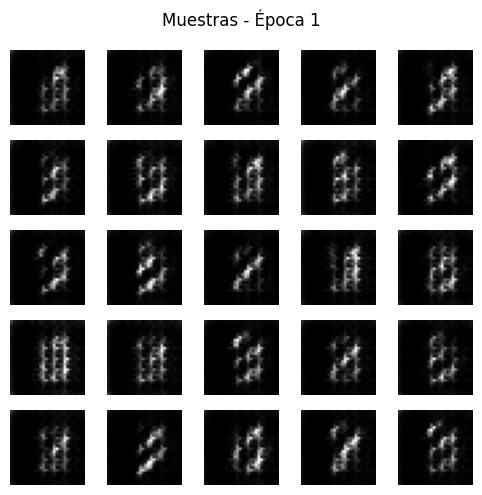

Ep 02 | St 100 | D_loss=1.089 | G_loss=0.945 | D(real)=0.38 | D(fake)=-0.42
Ep 02 | St 200 | D_loss=1.230 | G_loss=0.811 | D(real)=0.20 | D(fake)=-0.20


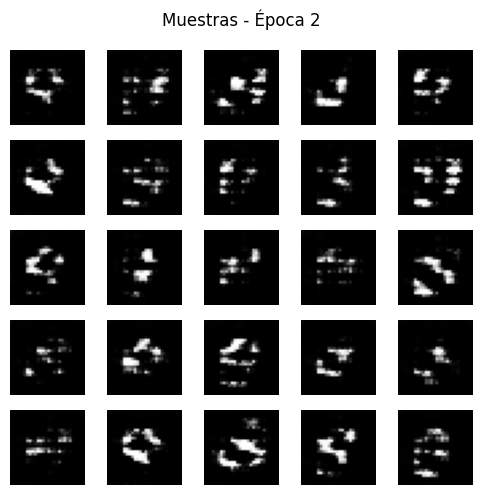

Ep 03 | St 100 | D_loss=1.325 | G_loss=0.678 | D(real)=0.28 | D(fake)=0.07
Ep 03 | St 200 | D_loss=1.304 | G_loss=0.726 | D(real)=0.20 | D(fake)=-0.04


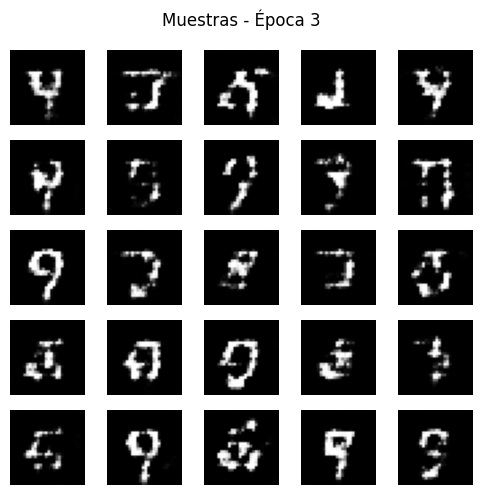

Ep 04 | St 100 | D_loss=1.279 | G_loss=0.819 | D(real)=0.07 | D(fake)=-0.22
Ep 04 | St 200 | D_loss=1.290 | G_loss=0.683 | D(real)=0.34 | D(fake)=0.05


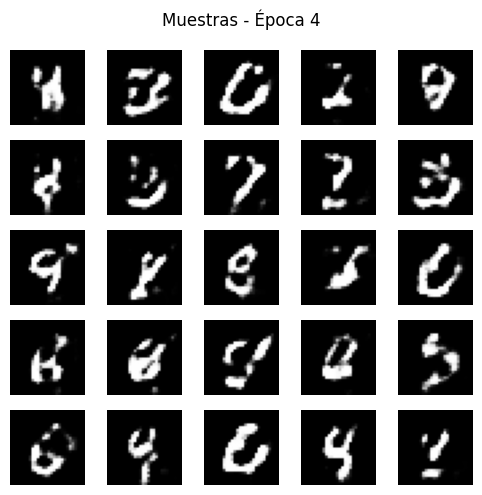

Ep 05 | St 100 | D_loss=1.296 | G_loss=0.785 | D(real)=0.09 | D(fake)=-0.15
Ep 05 | St 200 | D_loss=1.374 | G_loss=0.681 | D(real)=0.15 | D(fake)=0.06


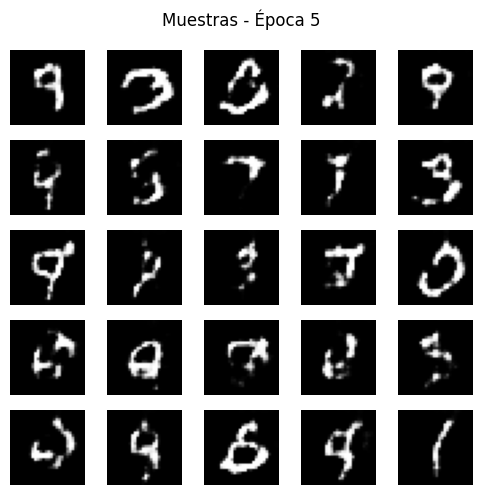

Ep 06 | St 100 | D_loss=1.296 | G_loss=0.778 | D(real)=0.10 | D(fake)=-0.14
Ep 06 | St 200 | D_loss=1.343 | G_loss=0.904 | D(real)=-0.18 | D(fake)=-0.36


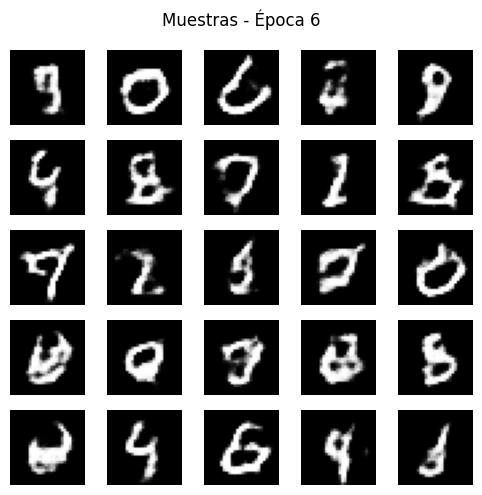

Ep 07 | St 100 | D_loss=1.283 | G_loss=0.730 | D(real)=0.23 | D(fake)=-0.05
Ep 07 | St 200 | D_loss=1.354 | G_loss=0.789 | D(real)=0.00 | D(fake)=-0.15


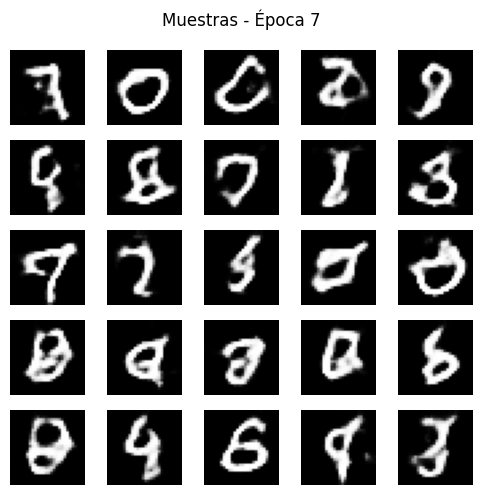

Ep 08 | St 100 | D_loss=1.351 | G_loss=0.791 | D(real)=-0.05 | D(fake)=-0.17
Ep 08 | St 200 | D_loss=1.347 | G_loss=0.699 | D(real)=0.12 | D(fake)=0.00


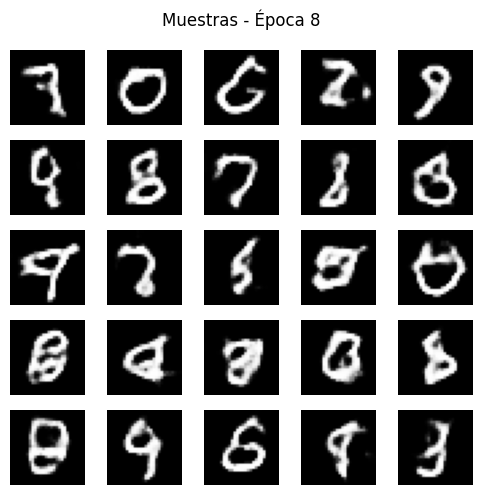

Ep 09 | St 100 | D_loss=1.347 | G_loss=0.783 | D(real)=-0.05 | D(fake)=-0.16
Ep 09 | St 200 | D_loss=1.365 | G_loss=0.700 | D(real)=0.09 | D(fake)=0.00


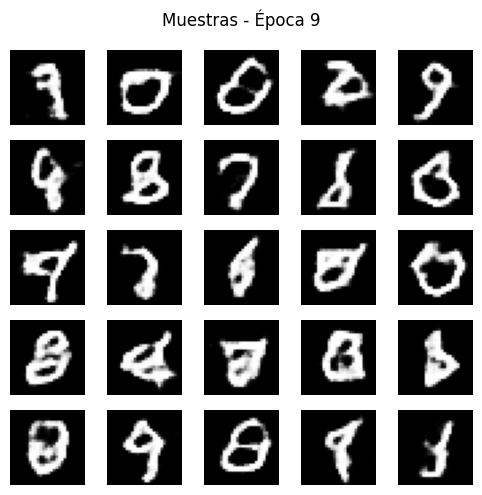

Ep 10 | St 100 | D_loss=1.416 | G_loss=0.721 | D(real)=-0.05 | D(fake)=-0.04
Ep 10 | St 200 | D_loss=1.270 | G_loss=0.832 | D(real)=0.05 | D(fake)=-0.24


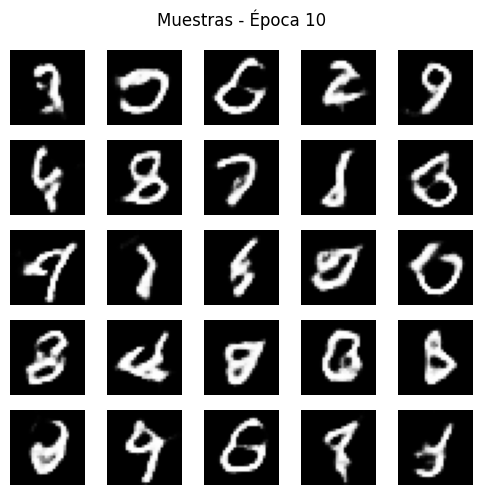

Ep 11 | St 100 | D_loss=1.434 | G_loss=0.651 | D(real)=0.04 | D(fake)=0.10
Ep 11 | St 200 | D_loss=1.331 | G_loss=0.714 | D(real)=0.13 | D(fake)=-0.02


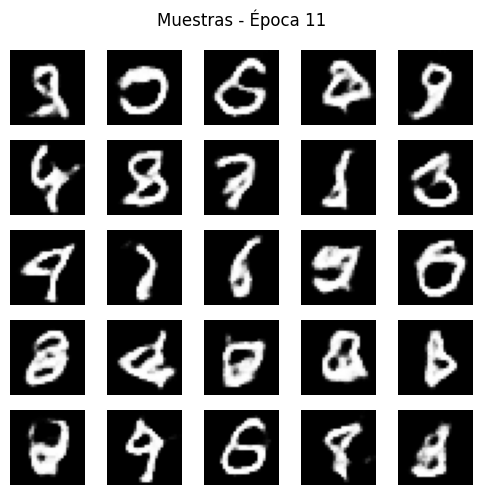

Ep 12 | St 100 | D_loss=1.323 | G_loss=0.737 | D(real)=0.13 | D(fake)=-0.06
Ep 12 | St 200 | D_loss=1.408 | G_loss=0.747 | D(real)=-0.10 | D(fake)=-0.09


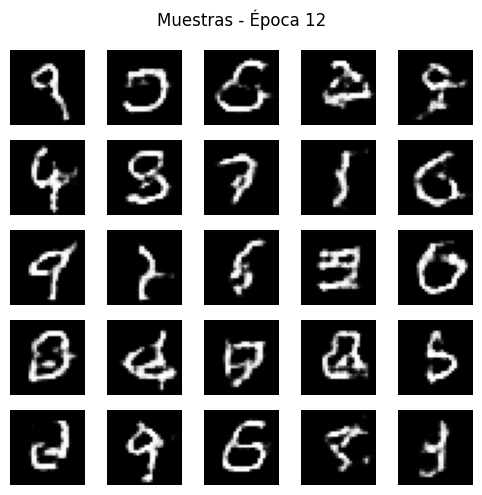

Ep 13 | St 100 | D_loss=1.339 | G_loss=0.730 | D(real)=0.09 | D(fake)=-0.05
Ep 13 | St 200 | D_loss=1.427 | G_loss=0.750 | D(real)=-0.11 | D(fake)=-0.09


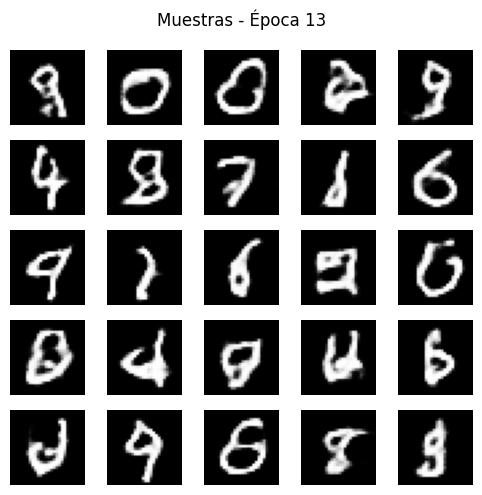

Ep 14 | St 100 | D_loss=1.380 | G_loss=0.637 | D(real)=0.19 | D(fake)=0.13
Ep 14 | St 200 | D_loss=1.339 | G_loss=0.703 | D(real)=0.13 | D(fake)=-0.00


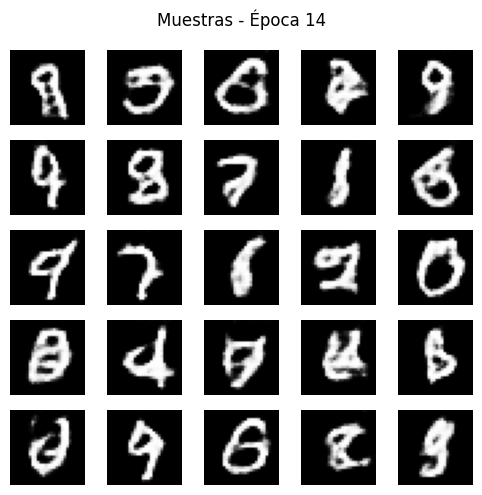

Ep 15 | St 100 | D_loss=1.284 | G_loss=0.750 | D(real)=0.22 | D(fake)=-0.08
Ep 15 | St 200 | D_loss=1.339 | G_loss=0.761 | D(real)=0.04 | D(fake)=-0.11


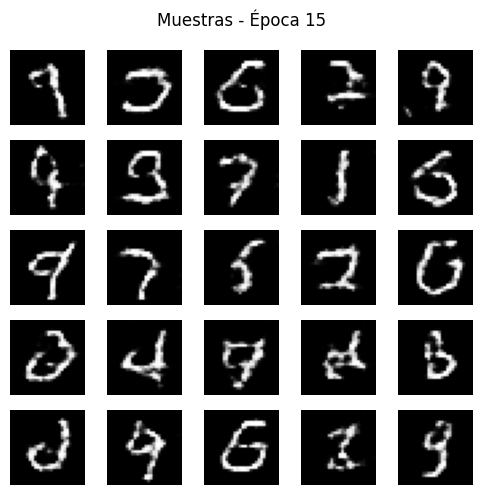

Ep 16 | St 100 | D_loss=1.447 | G_loss=0.718 | D(real)=-0.11 | D(fake)=-0.03
Ep 16 | St 200 | D_loss=1.443 | G_loss=0.729 | D(real)=-0.11 | D(fake)=-0.05


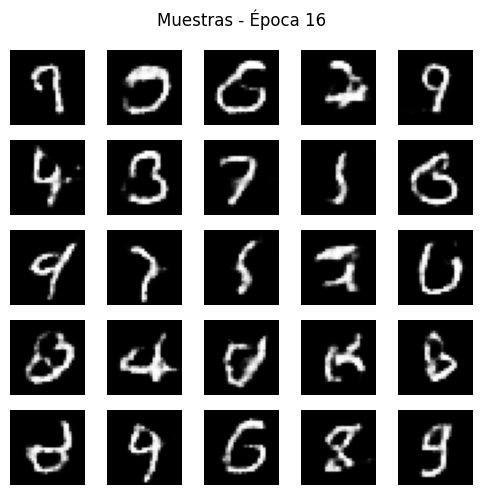

Ep 17 | St 100 | D_loss=1.460 | G_loss=0.676 | D(real)=-0.05 | D(fake)=0.05
Ep 17 | St 200 | D_loss=1.395 | G_loss=0.738 | D(real)=-0.04 | D(fake)=-0.07


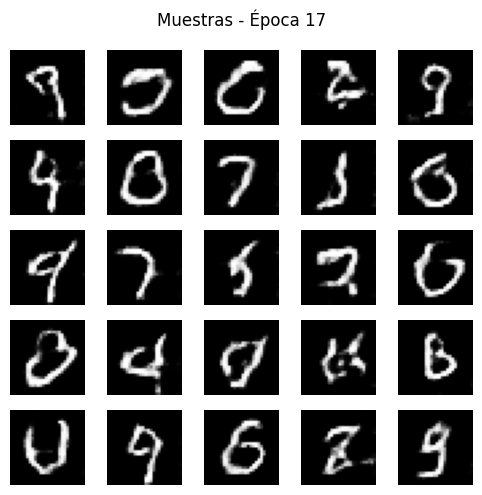

Ep 18 | St 100 | D_loss=1.277 | G_loss=0.811 | D(real)=0.05 | D(fake)=-0.21
Ep 18 | St 200 | D_loss=1.297 | G_loss=0.822 | D(real)=0.02 | D(fake)=-0.23


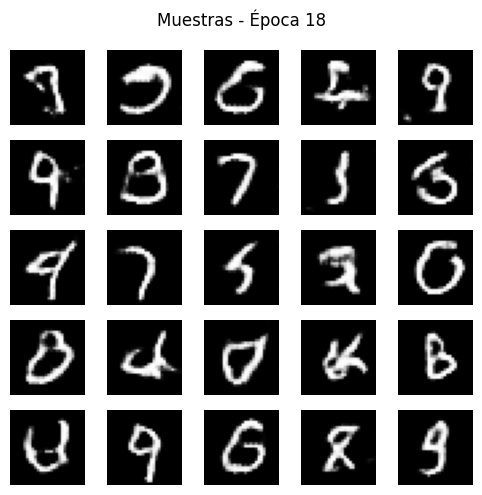

Ep 19 | St 100 | D_loss=1.275 | G_loss=0.803 | D(real)=0.09 | D(fake)=-0.19
Ep 19 | St 200 | D_loss=1.240 | G_loss=0.825 | D(real)=0.12 | D(fake)=-0.23


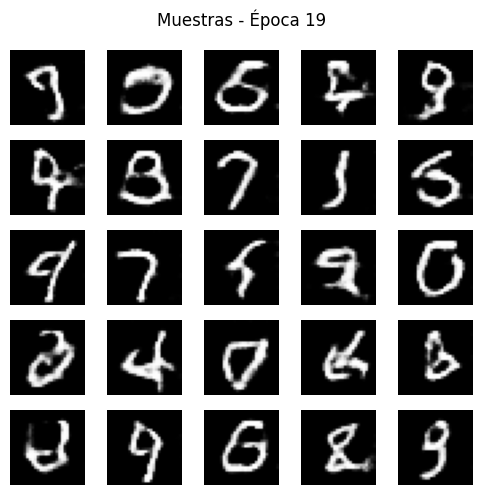

Ep 20 | St 100 | D_loss=1.228 | G_loss=0.818 | D(real)=0.19 | D(fake)=-0.21
Ep 20 | St 200 | D_loss=1.329 | G_loss=0.796 | D(real)=-0.01 | D(fake)=-0.18


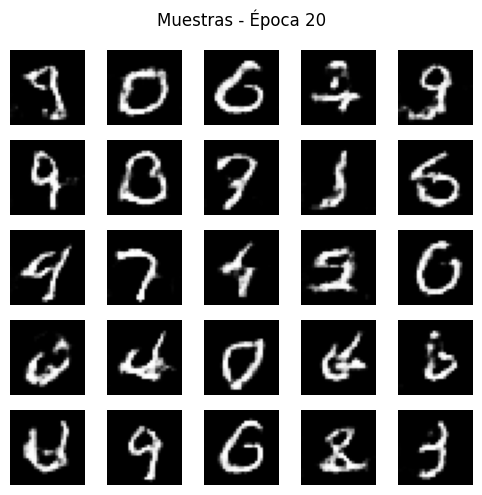

Ep 21 | St 100 | D_loss=1.307 | G_loss=0.736 | D(real)=0.15 | D(fake)=-0.06
Ep 21 | St 200 | D_loss=1.268 | G_loss=0.830 | D(real)=0.04 | D(fake)=-0.25


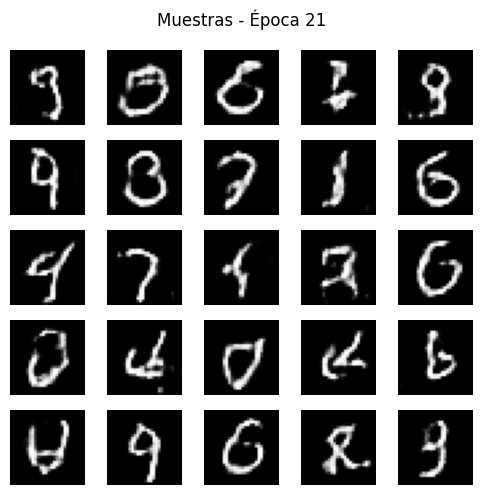

Ep 22 | St 100 | D_loss=1.372 | G_loss=0.767 | D(real)=-0.06 | D(fake)=-0.13
Ep 22 | St 200 | D_loss=1.284 | G_loss=0.774 | D(real)=0.13 | D(fake)=-0.14


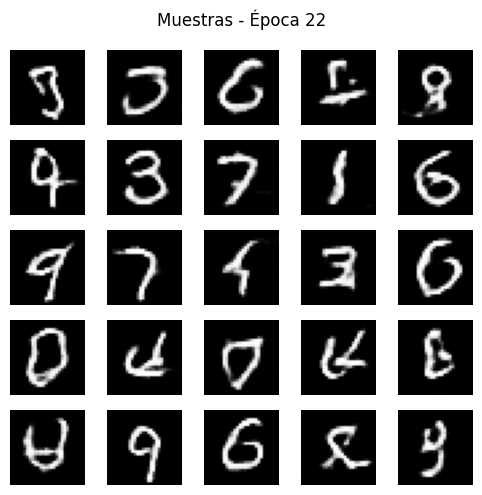

Ep 23 | St 100 | D_loss=1.439 | G_loss=0.735 | D(real)=-0.11 | D(fake)=-0.06
Ep 23 | St 200 | D_loss=1.482 | G_loss=0.761 | D(real)=-0.24 | D(fake)=-0.11


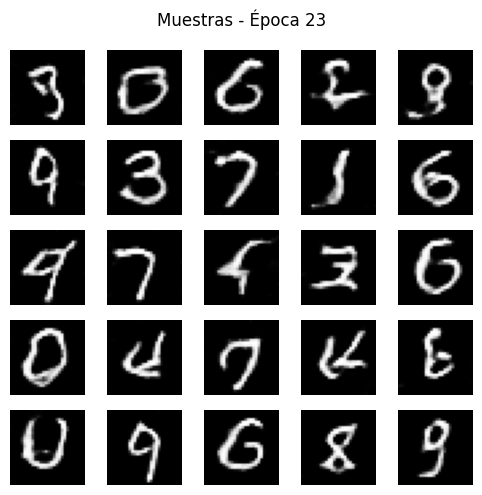

Ep 24 | St 100 | D_loss=1.417 | G_loss=0.780 | D(real)=-0.10 | D(fake)=-0.14
Ep 24 | St 200 | D_loss=1.281 | G_loss=0.748 | D(real)=0.21 | D(fake)=-0.08


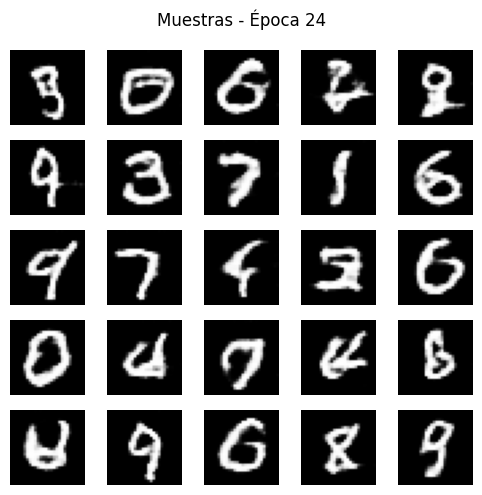

Ep 25 | St 100 | D_loss=1.347 | G_loss=0.686 | D(real)=0.17 | D(fake)=0.04
Ep 25 | St 200 | D_loss=1.350 | G_loss=0.745 | D(real)=0.09 | D(fake)=-0.07


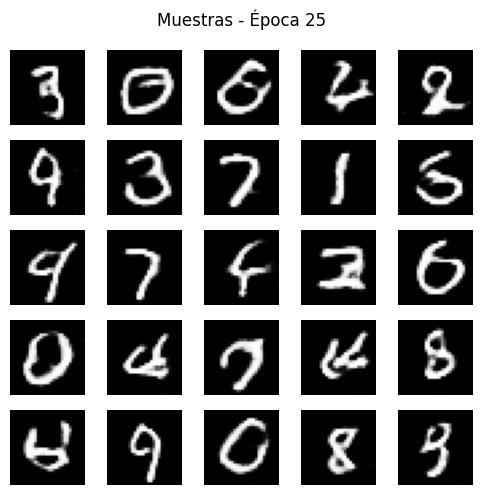

Ep 26 | St 100 | D_loss=1.384 | G_loss=0.754 | D(real)=-0.05 | D(fake)=-0.10
Ep 26 | St 200 | D_loss=1.220 | G_loss=0.808 | D(real)=0.25 | D(fake)=-0.19


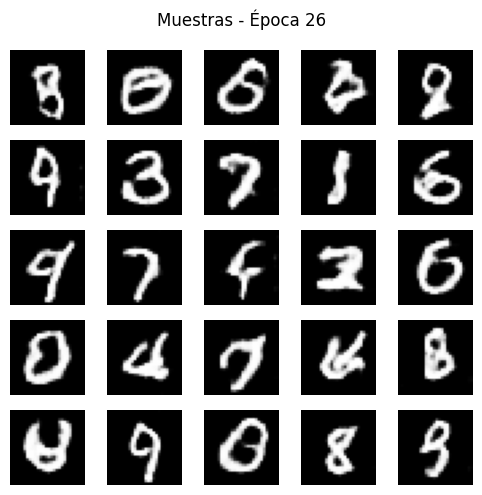

Ep 27 | St 100 | D_loss=1.403 | G_loss=0.713 | D(real)=-0.01 | D(fake)=-0.02
Ep 27 | St 200 | D_loss=1.325 | G_loss=0.680 | D(real)=0.29 | D(fake)=0.06


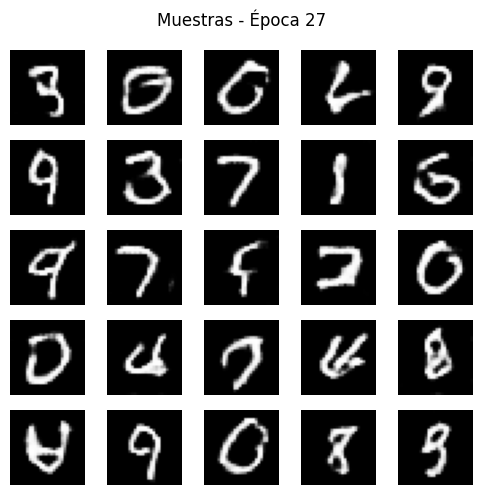

Ep 28 | St 100 | D_loss=1.436 | G_loss=0.778 | D(real)=-0.18 | D(fake)=-0.14
Ep 28 | St 200 | D_loss=1.253 | G_loss=0.782 | D(real)=0.21 | D(fake)=-0.14


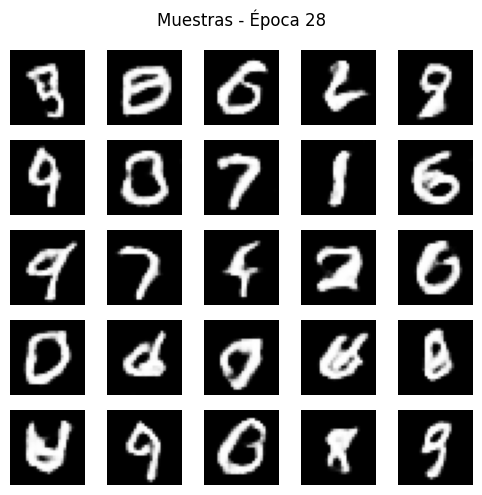

Ep 29 | St 100 | D_loss=1.349 | G_loss=0.772 | D(real)=0.05 | D(fake)=-0.12
Ep 29 | St 200 | D_loss=1.377 | G_loss=0.761 | D(real)=-0.05 | D(fake)=-0.12


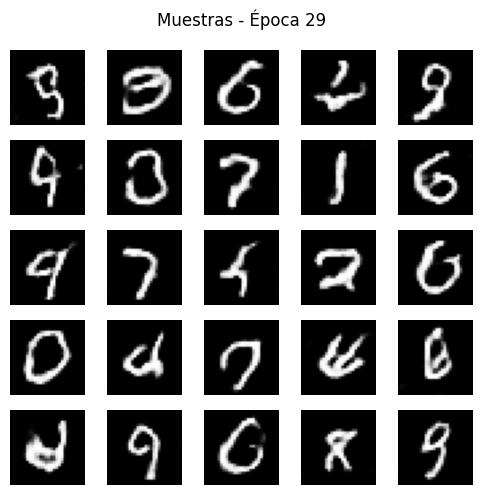

Ep 30 | St 100 | D_loss=1.359 | G_loss=0.688 | D(real)=0.12 | D(fake)=0.03
Ep 30 | St 200 | D_loss=1.252 | G_loss=0.864 | D(real)=0.06 | D(fake)=-0.30


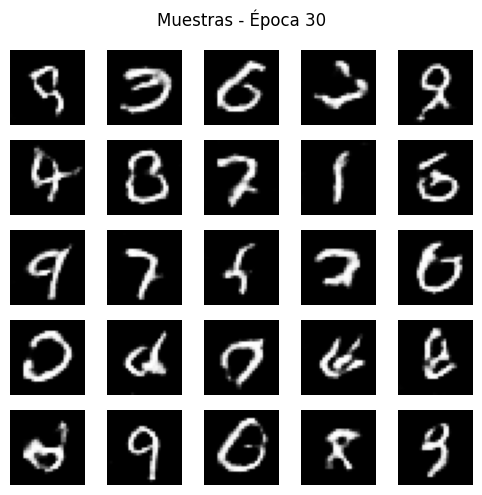

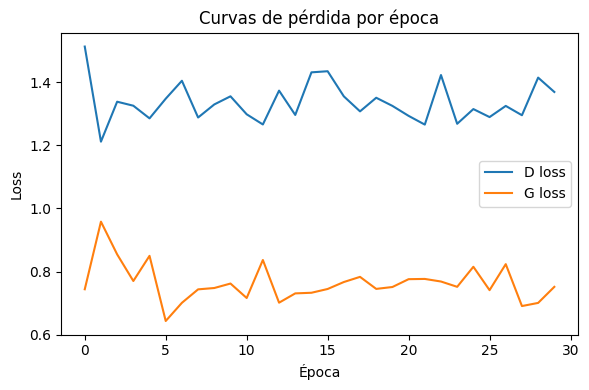

In [1]:
# ==============================
# 0) IMPORTS Y CHEQUEOS INICIALES
# ==============================

import tensorflow as tf                     # Importa TensorFlow
from tensorflow import keras                # Atajo para Keras (API de alto nivel de TF)
from keras import layers                    # Capas de Keras
import numpy as np                          # Numpy para manejo de arreglos
import matplotlib.pyplot as plt             # Para gráficos

# Fija una semilla para reproducibilidad (opcional, pero útil)
tf.random.set_seed(42)
np.random.seed(42)

# Imprime la versión de TF y si está activo el modo eager (debe ser True)
print("TF version:", tf.__version__)        # Esperado: 2.19.x
print("Eager?", tf.executing_eagerly())     # Debe ser True para iterar el dataset en Python

# Si "Eager? False", significa que en esta sesión se desactivó eager.
# Debes reiniciar el runtime y volver a ejecutar sin llamar a tf.compat.v1.disable_eager_execution().


# ===========================
# 1) HIPERPARÁMETROS DEL MODELO
# ===========================

IMG_SHAPE = (28, 28, 1)        # Formato de imagen para MNIST: 28x28 en escala de grises (1 canal)
Z_DIM     = 128                # Dimensión del vector latente de entrada al generador
BATCH     = 256                # Tamaño de lote para entrenamiento
EPOCHS    = 30                 # Número de épocas (sube si quieres mejor calidad)
LR_G      = 2e-4               # Learning rate del generador
LR_D      = 2e-4               # Learning rate del discriminador
BETA_1    = 0.5                # Parámetro beta_1 típico de DCGAN para Adam
BETA_2    = 0.999              # Parámetro beta_2 típico de DCGAN para Adam


# ==========================================
# 2) CARGA Y PREPROCESAMIENTO DEL DATASET
# ==========================================

# Carga MNIST desde Keras: x_train son imágenes, y_train son etiquetas (aquí no usamos etiquetas)
(x_train, _), _ = keras.datasets.mnist.load_data()  # Devuelve (60000, 28, 28)

# Convierte a float32 para operaciones de red neuronal
x_train = x_train.astype("float32")                 # Pasa de uint8 a float32

# Normaliza de [0, 255] a [-1, 1], porque el generador usa 'tanh' a la salida
x_train = (x_train / 127.5) - 1.0                   # Escala simétrica favorece entrenamiento estable

# Añade el canal (eje final) para tener forma (N, 28, 28, 1) que esperan las Conv2D
x_train = np.expand_dims(x_train, axis=-1)

# Construye un tf.data.Dataset para rendimiento, barajando y en lotes
train_ds = tf.data.Dataset.from_tensor_slices(x_train)        # Crea dataset desde numpy
train_ds = train_ds.shuffle(buffer_size=60000)                # Mezcla los 60k ejemplos
train_ds = train_ds.batch(BATCH, drop_remainder=True)         # Lotes del tamaño BATCH exacto
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)                # Prefetch para tubería más eficiente


# ==================================
# 3) DEFINICIÓN DEL GENERADOR (G)
# ==================================

def build_generator(z_dim=Z_DIM):
    """
    Construye el generador que mapea un vector latente z (R^Z_DIM)
    a una imagen 28x28x1 con activación tanh (rango ~[-1, 1]).
    Arquitectura tipo DCGAN simple con Conv2DTranspose.
    """
    inputs = keras.Input(shape=(z_dim,))                        # Entrada: vector latente z

    # Proyección densa a un mapa 7x7 con 256 filtros; sin bias (opcional) por batchnorm
    x = layers.Dense(7 * 7 * 256, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)                          # Normalización para estabilizar entrenamiento
    x = layers.ReLU()(x)                                        # No-linealidad ReLU
    x = layers.Reshape((7, 7, 256))(x)                          # Reshape a bloque inicial 7x7x256

    # Bloque 1: Conv2DTranspose (stride=1) mantiene 7x7, sube canales -> 128
    x = layers.Conv2DTranspose(128, kernel_size=5, strides=1, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)                          # BN ayuda a estabilizar y acelerar
    x = layers.ReLU()(x)                                        # ReLU

    # Bloque 2: Conv2DTranspose (stride=2) pasa de 7x7 a 14x14, canales 64
    x = layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)                          # BN
    x = layers.ReLU()(x)                                        # ReLU

    # Bloque 3: Conv2DTranspose (stride=2) pasa de 14x14 a 28x28, canales 1
    # Activación tanh para salir en rango [-1, 1]
    outputs = layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                     use_bias=False, activation="tanh")(x)

    return keras.Model(inputs, outputs, name="generator")       # Devuelve el modelo Generator

# Instancia el generador
generator = build_generator(Z_DIM)


# ======================================
# 4) DEFINICIÓN DEL DISCRIMINADOR (D)
# ======================================

def build_discriminator(img_shape=IMG_SHAPE):
    """
    Construye el discriminador que toma una imagen 28x28x1
    y devuelve un escalar (logits, sin sigmoid) indicando "real vs fake".
    """
    inputs = keras.Input(shape=img_shape)                       # Entrada: imagen (28,28,1)

    # Bloque 1: Conv2D stride=2 baja a 14x14, 64 filtros
    x = layers.Conv2D(64, kernel_size=5, strides=2, padding="same")(inputs)
    x = layers.LeakyReLU(alpha=0.2)(x)                          # LeakyReLU evita morir gradientes
    x = layers.Dropout(0.3)(x)                                  # Dropout para regularizar

    # Bloque 2: Conv2D stride=2 baja a 7x7, 128 filtros
    x = layers.Conv2D(128, kernel_size=5, strides=2, padding="same")(x)
    x = layers.LeakyReLU(alpha=0.2)(x)                          # LeakyReLU
    x = layers.Dropout(0.3)(x)                                  # Dropout

    # Aplana y densa a 1 logit (sin activación); usaremos BCE from_logits=True
    x = layers.Flatten()(x)                                     # Flatten de mapas de características
    logits = layers.Dense(1)(x)                                 # Logit (no sigmoid)

    return keras.Model(inputs, logits, name="discriminator")    # Devuelve el modelo Discriminator

# Instancia el discriminador
discriminator = build_discriminator(IMG_SHAPE)


# =======================================================
# 5) FORZAR "BUILD" Y VER RESÚMENES (evita errores shapes)
# =======================================================

# Pasa un batch "dummy" una vez para que Keras conozca las formas internas antes de summary()
_ = generator(tf.zeros((1, Z_DIM), dtype=tf.float32))           # Construye grafo del generator
_ = discriminator(tf.zeros((1, *IMG_SHAPE), dtype=tf.float32))  # Construye grafo del discriminator

# Muestra las arquitecturas (opcional)
generator.summary()
discriminator.summary()


# ==========================================
# 6) PÉRDIDAS Y OPTIMIZADORES (DCGAN clásico)
# ==========================================

# Binary Crossentropy con logits: no aplicamos sigmoid en el discriminador
bce = keras.losses.BinaryCrossentropy(from_logits=True)         # BCE estable con logits

# Optimizadores Adam con parámetros típicos para GAN
g_opt = keras.optimizers.Adam(learning_rate=LR_G, beta_1=BETA_1, beta_2=BETA_2)  # Opt G
d_opt = keras.optimizers.Adam(learning_rate=LR_D, beta_1=BETA_1, beta_2=BETA_2)  # Opt D


# ==========================================
# 7) UN PASO DE ENTRENAMIENTO (train_step)
# ==========================================

@tf.function  # Compila a grafo para acelerar; imprime con tf.print si necesitas logs internos
def train_step(real_imgs):
    """
    Ejecuta un paso de entrenamiento:
    - Muestra ruido -> G genera imágenes falsas
    - D evalúa reales y falsas -> calcula pérdidas
    - Propaga gradientes y actualiza parámetros de D y G
    Devuelve: d_loss, g_loss, media logits reales, media logits falsas
    """
    # Tamaño del batch dinámico (para última iteración o seguridad)
    batch_size = tf.shape(real_imgs)[0]

    # Muestra ruido gaussiano N(0, I) para el generador
    noise = tf.random.normal([batch_size, Z_DIM])

    # Cintas de gradiente separadas para D y G
    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
        # Genera imágenes falsas con G (modo training True para BN)
        fake_imgs = generator(noise, training=True)

        # Evalúa D en reales y falsas (training True para Dropout)
        d_logits_real = discriminator(real_imgs, training=True)
        d_logits_fake = discriminator(fake_imgs, training=True)

        # Pérdida del discriminador: reales vs 1, falsas vs 0
        d_loss_real = bce(tf.ones_like(d_logits_real), d_logits_real)   # target 1 para reales
        d_loss_fake = bce(tf.zeros_like(d_logits_fake), d_logits_fake)  # target 0 para falsas
        d_loss = d_loss_real + d_loss_fake                              # suma ambas contribuciones

        # Pérdida del generador: quiere que D crea que las falsas son reales (target 1)
        g_loss = bce(tf.ones_like(d_logits_fake), d_logits_fake)

    # Calcula gradientes respecto a variables entrenables
    d_grads = d_tape.gradient(d_loss, discriminator.trainable_variables)  # dL/dθ_D
    g_grads = g_tape.gradient(g_loss, generator.trainable_variables)      # dL/dθ_G

    # Aplica actualizaciones con Adam
    d_opt.apply_gradients(zip(d_grads, discriminator.trainable_variables))
    g_opt.apply_gradients(zip(g_grads, generator.trainable_variables))

    # Devuelve métricas útiles para monitoreo
    return (d_loss,
            g_loss,
            tf.reduce_mean(d_logits_real),  # media de logits en reales
            tf.reduce_mean(d_logits_fake))  # media de logits en falsas


# =======================================================
# 8) ENTRENAMIENTO COMPLETO + MUESTRAS VISUALES POR ÉPOCA
# =======================================================

# Ruido fijo para ver progreso consistente a lo largo de las épocas
fixed_noise = tf.random.normal([25, Z_DIM])   # Generaremos una grilla 5x5

# Listas para registrar pérdidas (opcional; útil si quieres graficar luego)
g_history, d_history = [], []

def show_grid(images, title="Muestras"):
    """
    Dibuja una grilla 5x5 de imágenes de forma segura.
    'images' se espera en rango [-1,1] con forma (25, 28, 28, 1).
    """
    # Asegura tensor en CPU y convierte a numpy
    imgs = tf.convert_to_tensor(images)
    imgs = tf.clip_by_value((imgs + 1.0) * 127.5, 0.0, 255.0)           # Vuelve a [0,255]
    imgs = tf.cast(imgs, tf.uint8).numpy()                               # uint8 para imshow

    # Crea figura y coloca 25 subplots 5x5
    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.imshow(imgs[i, :, :, 0], cmap="gray")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Bucle principal de entrenamiento
for epoch in range(1, EPOCHS + 1):                         # Recorre EPOCHS
    for step, real_batch in enumerate(train_ds, start=1):  # Itera dataset en eager
        # Un paso de entrenamiento: devuelve pérdidas y medias de logits
        d_loss, g_loss, d_real_mean, d_fake_mean = train_step(real_batch)

        # Cada 100 pasos, imprime métricas (conversión a float para legibilidad)
        if step % 100 == 0:
            # En modo eager puedes usar .numpy(); si no, tf.print
            print(f"Ep {epoch:02d} | St {step:03d} | "
                  f"D_loss={float(d_loss):.3f} | G_loss={float(g_loss):.3f} | "
                  f"D(real)={float(d_real_mean):.2f} | D(fake)={float(d_fake_mean):.2f}")

    # Al final de cada época: genera muestras con ruido fijo para seguimiento visual
    fake_fixed = generator(fixed_noise, training=False)     # Modo inferencia
    show_grid(fake_fixed, title=f"Muestras - Época {epoch}")

    # Registra promedios (opcional): aquí usamos últimos valores de la época
    g_history.append(float(g_loss))
    d_history.append(float(d_loss))

# (Opcional) Grafica curvas de pérdida acumuladas por época
plt.figure(figsize=(6, 4))
plt.plot(d_history, label="D loss")
plt.plot(g_history, label="G loss")
plt.title("Curvas de pérdida por época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


# ===============================================
# 9) CONSEJOS DE ESTABILIDAD (AJUSTES OPCIONALES)
# ===============================================

# - Si aparecen NaNs: baja LR_G/LR_D (por ej. 1e-4), añade más Dropout en D, o usa "label smoothing":
#   Ejemplo (sustituyendo targets 1.0 por 0.9 en las pérdidas de reales y g_loss).
# - Si G colapsa (moda): prueba aumentar BATCH, o insertar otro bloque conv en G/D.
# - Para Fashion-MNIST: cambia solo la carga del dataset (keras.datasets.fashion_mnist).
# - Para CIFAR-10 (32x32x3): necesitarás aumentar la capacidad del modelo y ajustar IMG_SHAPE.
